In [ ]:
# author: René Kopeinig
# script: Time Series Forecast
# description: Time Series Forecast on Proba-V NDVI, Landsat 8 NDVI and CHIRPS precipitation data
#              Note: Please make sure you have all dependencies in Python installed and you are signed up for Google Earth Engine.

In [113]:
# Import Dependencies
import time
import geextract
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from pprint import pprint
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [114]:
lon = -89.464111
lat = 18.770896 

out = geextract.ts_extract(lon=lon, lat=lat, sensor='LC8', start=datetime(1980, 1, 1, 0, 0),
                           end=datetime.today(), radius=500)

In [117]:

# Create Pandas DataFrame
data=pd.DataFrame(out)
data['id'] = data['id'].map(lambda x: geextract.get_date(x))

# Set Index
data=data.set_index('id')
data.index=pd.to_datetime(data.index)
data=data.fillna(method='bfill')

# Indices
data['ndvi'] = (data['B5'] - data['B4']) / (data['B5'] + data['B4'])
data['ndmi'] = (data['B5'] - data['B6']) / (data['B5'] + data['B6'])
data['nbr'] = (data['B5'] - data['B7']) / (data['B5'] + data['B7'])
data['avi'] = (data['B5'] *(1-data['B3'])*(data['B4']-data['B3']))/3

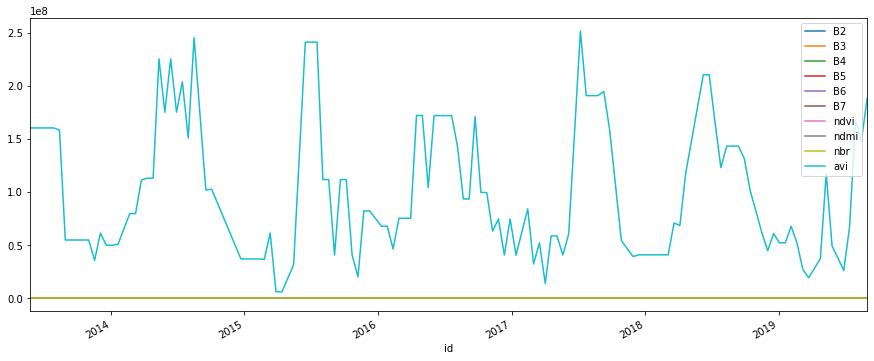

In [118]:
data.plot()